In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn

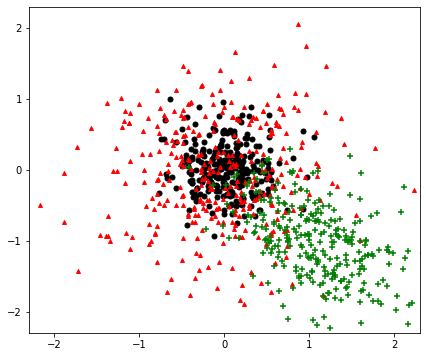

In [2]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

https://stackoverflow.com/questions/23204320/drawing-decision-boundary-of-two-multivariate-gaussian-in-python

https://stackoverflow.com/questions/19576761/drawing-decision-boundary-of-two-multivariate-gaussian

https://xavierbourretsicotte.github.io/Optimal_Bayes_Classifier.html

https://xavierbourretsicotte.github.io/LDA_QDA.html

https://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python

https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/

https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

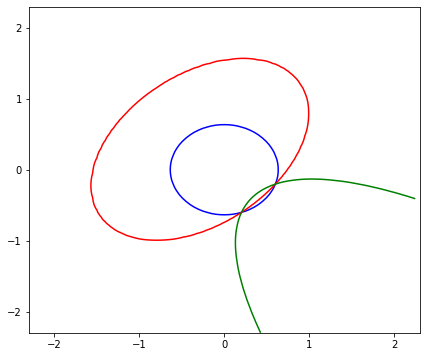

In [3]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


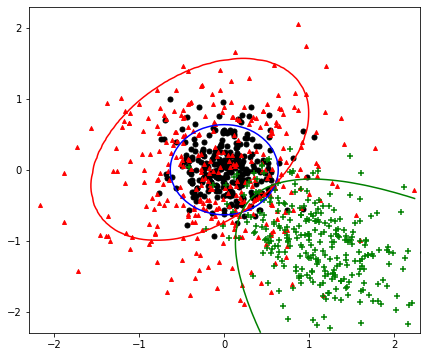

In [4]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


In [6]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def compare_find_equals(number_a, number_b, number_c):
    if abs(number_a - number_b) / number_a <= 0.1 and abs(number_a - number_c) / number_a <= 0.1:
        print(number_a)
        return 1
    return 0
    
feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
matrix_a = np.vectorize(dist_1)(grid_X, grid_Y)
matrix_b = np.vectorize(dist_2)(grid_X, grid_Y)
matrix_c = np.vectorize(dist_3)(grid_X, grid_Y)
np.vectorize(compare_find_equals)(matrix_a, matrix_b, matrix_c)

0.21539279301848246
0.21539279301849612


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
def find_intersection_points(_px, _py, number_a):
    if dist_1(_px, _py) == number_a:
        print(_px, _py)
        return 1
    return 0

np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301848246)
print("\n######\n")
np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301849612)

0.1999999999999913 -0.6000000000000059
-0.6000000000000059 0.1999999999999913

######

0.5999999999999899 -0.20000000000000728
-0.20000000000000728 0.5999999999999899


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
p_intersection_1 = (0.2, -0.6)
p_intersection_2 = (0.6, -0.2)

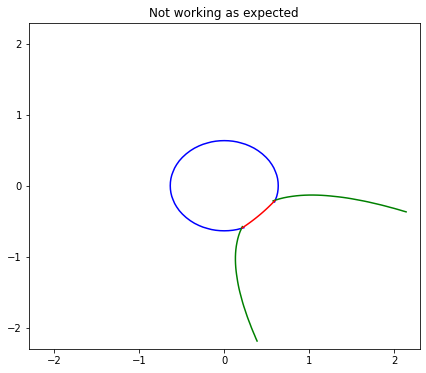

In [33]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

# https://matplotlib.org/2.0.2/examples/pylab_examples/contourf_demo.html
def cut_off_decision_boudary_within_rec(_grid_X, _grid_Y, matrix):
    def cut_within_rec(_px, _py, _element):
        if(0.2 < _px < 0.6 - 0.05 and -0.6 < _py < -0.2 - 0.05):
            return np.nan
        else:
            return _element
    return np.vectorize(cut_within_rec)(_grid_X, _grid_Y, matrix)
        
feature_x = np.arange(-2.2, 2.2, 0.05)
feature_y = np.arange(-2.2, 2.2, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)


feature_x_rec = np.arange(0.2, 0.61, 0.01)
feature_y_rec = np.arange(-0.6, -0.19, 0.01)
[grid_X_rec, grid_Y_rec] = np.meshgrid(feature_x_rec, feature_y_rec)

fig, ax = plt.subplots(1, 1)
_Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
Z12 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z12)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
_Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
Z23 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z23)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

Z13 = decision_boudary(dist_1, dist_3, grid_X_rec, grid_Y_rec)
ax.contour(grid_X_rec, grid_Y_rec, Z13, [0], colors='red')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
ax.set_title('Not working as expected')
plt.show()


https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

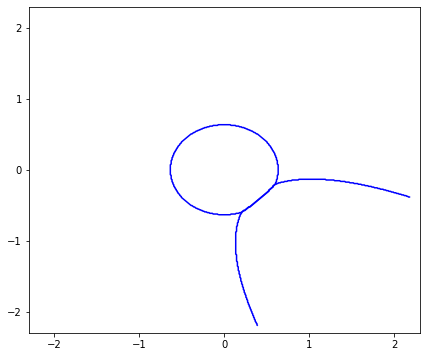

In [19]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

# https://stackoverflow.com/questions/48639028/
def compare_and_assign_value(number_a, number_b, number_c):
    z = np.array([number_a, number_b, number_c])
    return np.argmax(z)
    
def decision_boudary(func_a, func_b, func_c, _grid_X, _grid_Y):
    matrix_a = np.vectorize(func_a)(_grid_X, _grid_Y)
    matrix_b = np.vectorize(func_b)(_grid_X, _grid_Y)
    matrix_c = np.vectorize(func_c)(_grid_X, _grid_Y)
    return np.vectorize(compare_and_assign_value)(matrix_a, matrix_b, matrix_c)
    

feature_x = np.arange(-2.2, 2.2, 0.01)
feature_y = np.arange(-2.2, 2.2, 0.01)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z = decision_boudary(dist_1, dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z, levels=[0.5, 1.5, 2.5], colors='blue')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


We can't use dropout with MLPClassifier.

https://datascience.stackexchange.com/questions/24275/scikit-mlpclassifier-vs-tensorflow-dnnclassifier

https://github.com/scikit-learn/scikit-learn/issues/6175